In [1]:
import sys
sys.path.append('../../')

from scripts.neuralnetwork.autoencoder import Autoencoder

/home/daan/.anaconda3/envs/pacs/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# A = Autoencoder()
# A.get_data('../../dataset/FN_train/FN_train.npz',compressed_name='test_data')
# A.build_model()
# A.train_model()
# A.save_model('test_smooth_2')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
test = np.load('../../dataset/FN_test/FN_test_0.npz')['data'][0]
pred = A.autoencoder.predict(test)


# for i in [50*i for i in range(20)]:
#     plt.subplot(211)
#     plt.imshow(test[i,:,:,0])
#     plt.subplot(212)
#     plt.imshow(pred[i,:,:,0])
#     plt.show()

plt.subplot(211)
plt.plot(test[:,10,10,0])
plt.plot(pred[:,10,10,0])
plt.subplot(212)
plt.plot(test[:,10,10,1])
plt.plot(pred[:,10,10,1])
plt.show()
A.encoder.predict(test).shape

NameError: name 'A' is not defined

In [11]:
train = np.load('../../dataset/FN_train/FN_train.npz')['test_data']
A = Autoencoder(model_name='latdim10')
enc_raw = A.encode(train)
enc_sm = A.encode(train, smooth=True)

ValueError: in user code:

    File "/home/daan/.anaconda3/envs/pacs/lib/python3.10/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/home/daan/.anaconda3/envs/pacs/lib/python3.10/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/daan/.anaconda3/envs/pacs/lib/python3.10/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/home/daan/.anaconda3/envs/pacs/lib/python3.10/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/home/daan/.anaconda3/envs/pacs/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/daan/.anaconda3/envs/pacs/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "Encoder" is incompatible with the layer: expected shape=(None, 20, 20, 2), found shape=(None, 1001, 20, 20, 2)


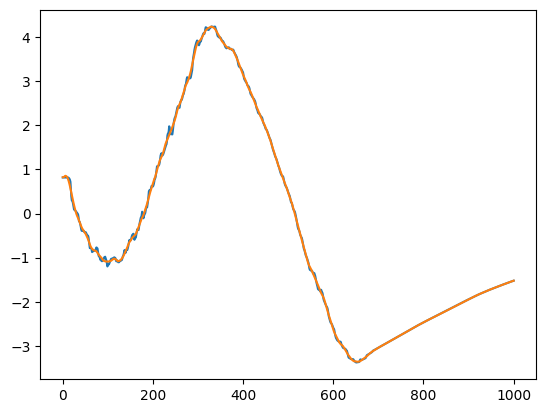

In [8]:
i = 9
plt.plot(enc_raw[:,i])
plt.plot(enc_sm[:,i])
plt.show()

In [13]:
enc = np.zeros((100,1001,10))
for i in range(100):
    enc[i] = A.encode(train[i], smooth=True)

In [15]:
np.save('encoded_smooth2.npy',enc)